# Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

from diabetes_prediction.utils.data.dataloader import *

# Load Data

In [3]:
meta_datas, datas = load_dataset()

# Sample child

In [4]:
data_id = 'sample_child'

In [5]:
meta     = meta_datas[data_id]
raw_data = datas[data_id]

In [6]:
meta.head()

,question_id,final_id,description,options,keywords
0,IDN.000_00.000,RECTYPE,file type identifier,"{'65': 'paradata', '60': 'family', '40': 'sample child', '30': 'sample adult', '25': 'income imputation', '20': 'person', '10': 'household'}",[]
1,IDN.000_02.000,SRVY_YR,year of national health interview survey,{'year': 'survey year'},[]
2,IDN.000_04.000,HHX,household number,{},[household number]
3,IDN.000_25.000,INTV_QRT,interview quarter,"{'4': 'quarter 4', '3': 'quarter 3', '2': 'quarter 2', '1': 'quarter 1'}",[]
4,IDN.000_30.000,INTV_MON,assignment/interview month,"{'12': 'december', '11': 'november', '10': 'october', '09': 'september', '08': 'august', '07': 'july', '06': 'june', '05': 'may', '04': 'april', '03': 'march', '02': 'february', '01': 'january'}",[interview month]


# Target

In [7]:
target = 'CCONDRR6'

In [8]:
meta_vals = get_meta_values(meta, target)
print(meta_vals['description'])
print(meta_vals['options'])

ever told sc had diabetes
{'9': "don't know", '8': 'not ascertained', '7': 'refused', '2': 'not mentioned', '1': 'mentioned', '-1': 'unknown'}


# Preprocessing

In [9]:
from diabetes_prediction.utils.data.preprocessing import *

data = preprocess_sample_child(raw_data, meta, target)
data

* replace_ambiguous_options    | 0.55s (0.01m)
* impute_data                  | 0.31s (0.01m)
* change_dtypes                | 0.11s (0.00m)
* extract_family_id            | 0.00s (0.00m)
* drop_columns                 | 0.07s (0.00m)
* extract_label                | 0.00s (0.00m)
* manual_handling              | 0.01s (0.00m)


,FPX,SEX,HISPAN_I,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,INTV_MON,REGION,PSTRAT,PPSU,WTIA_SC,WTFA_SC,CUSUALPL,CPLKIND,CHCPLROU,CHCPLKND,CHCCHGYR,CHCCHGHI,CHCDLYR1,CHCDLYR2,CHCDLYR3,CHCDLYR4,CHCDLYR5,CHCAFYR,CHCAFYR1,CHCAFYR2,CHCAFYR3,CHCAFYR4,CDNLONGR,CHCSYR11,CHCSYR12,CHCSYR13,CHCSYR14,CHCSYR1,CHCSYR2,CHCSYR3,CHCSYR4,CHCSYR5,CHCSYR6,CHCSYR7,CHCSYR81,CHCSYR82,CHCSYR10,CHCSYREM,CHPXYR_C,CHERNOY2,CHCHYR,CHCHMOYR,CHCHNOY2,CHCNOYR2,CSRGYR,CMDLONGR,RSRGNOYP,CSHFLU12,CSHFLUNM,CSHFLUM1,CSHFLUY1,CSHSPFL1,CSHFLUM2,CSHFLUY2,CSHSPFL2,AMR1R,AODD1,AMR1RN,AODD1N,ADD2,AMR2R,AUTISM,AODD2,ADD2N,AMR2RN,AUTISMN,AODD2N,CCONDRR1,CCONDRR2,CCONDRR3,CCONDRR4,CCONDRR5,CCONDRR6,CCONDRR7,CCONDRR8,CCONDRR9,CPOX,CPOX12MO,CASHMEV,CASSTILL,CASHYR,CASERYR1,CASMTYP,CASMDTP2,CASCLASS,CAS_REC,CAS_RES,CAS_MON,CAPENVLN,CASYMPT,CARESCUE,CAACTLIM,HAYF1,RALLG1,DALLG1,SALLG1,DIARH1,ANEMIA1,EARINF1,SEIZE1,HAYF2,RALLG2,DALLG2,SALLG2,DIARH2,ANEMIA2,FHEAD,EARINF2,SEIZE2,STUTTER,CHSTATYR,CCOLD2W,CINTIL2W,CHEARST1,CVISION,CBLIND,IHSPEQ,IHMOB,IHMOBYR,PROBRX,LEARND,CMHAGM15,CMHAGF15,BWTGRM_P,TOTOZ_P,CHGHT_TC,CWGHT_TC,BMI_SC,MHIBOY2,MHIGRL2,CASMHSP1,CASMMED1,CASMCAN1,CASWMP1,SCHDAYRP,CWZMSWKP,CAROUTP,CSRESPNO,LATEINTC,CSRELTVP,RSCL2_C2,RSCL2_E2,RSCL3_E3,RSCL5_P5,RSCL5_H5,RSCL6,family_id,label
0,03,1,12,1,1,1,16.00,1,2,137.00,38.00,5187.60,6055.00,1,2,1,-1,2,-1,2,2,2,2,2,-1,2,2,2,2,3,-1,-1,-1,-1,2,1,2,2,1,2,-1,1,1,2,2,2,0,2,-1,-1,8,2,1,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,2,2,2,2,2,2,3,1,1,2,1,2,2,2,-1,2,2,-1,-1,3743.00,132.00,64.00,120.00,2687.00,0.00,0.00,-1,-1,-1,-1,7.00,-1.00,-1,01,2,1,2,1,0,0,1,0,000004012018,0
1,03,1,12,1,1,1,9.00,2,3,106.00,22.00,10518.60,11581.00,1,2,1,-1,2,-1,2,2,2,2,2,-1,2,2,2,2,1,-1,-1,-1,-1,2,2,2,2,2,2,-1,1,1,2,2,2,0,2,-1,-1,2,2,1,-1,1,1,12,2017,1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,3,2,2,1,2,-1,2,2,-1,2,2,-1,-1,4310.00,152.00,64.00,120.00,2125.00,0.00,0.00,-1,-1,-1,-1,5.00,-1.00,-1,01,2,1,2,0,0,0,2,0,000006012018,0
2,03,1,12,1,1,1,3.00,3,2,117.00,25.00,3204.40,3558.00,1,2,1,-1,2,-1,2,2,2,2,2,-1,2,2,2,2,0,-1,-1,-1,-1,2,2,2,2,2,1,-1,2,1,2,2,1,0,2,-1,-1,2,2,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,3,2,2,1,2,-1,2,2,-1,2,2,0,-1,3856.00,136.00,64.00,120.00,2125.00,2.00,0.00,-1,-1,-1,-1,-1.00,-1.00,-1,01,2,1,-1,-1,-1,-1,-1,-1,000008012018,0
3,04,1,12,1,1,1,0.00,3,1,140.00,152.00,3573.60,4447.00,1,2,1,-1,2,-1,2,2,2,2,2,2,-1,-1,-1,-1,-1,2,2,2,2,-1,-1,-1,-1,-1,-1,-1,1,1,2,2,1,01,2,-1,-1,6,2,1,-1,2,-1,-1,-1,-1,-1,-1,-1,2,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,-1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,2,2,1,2,2,2,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,2,1,2,-1,2,2,-1,1,-1,-1,-1,3431.00,121.00,64.00,120.00,2125.00,0.00,0.00,-1,-1,-1,-1,-1.00,-1.00,-1,01,2,1,-1,-1,-1,-1,-1,-1,000010012018,0
4,02,1,12,2,2,2,10.00,1,3,120.00,21.00,4032.80,4567.00,1,2,1,-1,2,-1,2,2,2,2,2,-1,2,2,2,2,1,-1,-1,-1,-1,2,1,2,2,2,2,-1,2,1,2,2,1,0,2,-1,-1,6,2,1,-1,1,1,11,2017,1,-1,-1,-1,-1,-1,-1,-1,2,2,2,2,-1,-1,-1,-1,2,2,2,2,2,2,2,2,2,2,-1,1,1,2,2,1,2,2,1,1,1,2,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,2,1,1,2,2,2,2,1,2,2,3,2,2,2,2,-1,2,2,-1,1,2,-1,-1,3714.00,131.00,64.00,120.00,2125.00,0.00,0.00,2,1,2,1,10.00,2.00,2,01,1,1,2,0,0,0,1,0,000013012018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

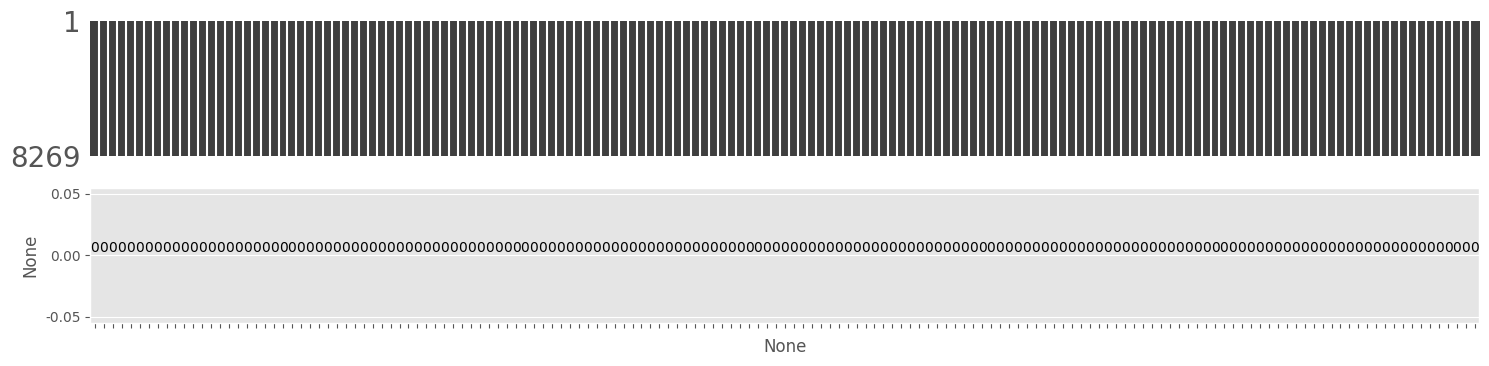

In [10]:
eda.plot_missing_value(data, figsize=(15, 4), title=False)

## EDA 1. Sampling 1 child for each family

In [11]:
data['family_id'].value_counts().max()

1

## EDA 2. What's meaning of `FPX`?

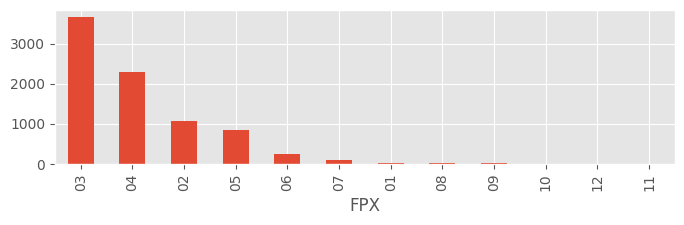

In [12]:
data['FPX'].value_counts().plot.bar(figsize=(8, 2));

## EDA 3. Severely imbalanced target

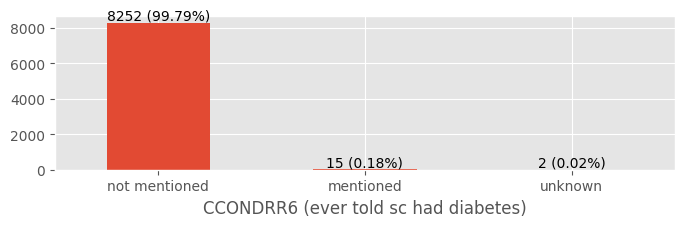

In [13]:
def barplot(data, meta, col):
    # Preparation
    meta_vals = get_meta_values(meta, col)
    desc      = meta_vals['description']
    options   = meta_vals['options']
    
    cnts  = data[col].replace(options).value_counts().reset_index()
    total = cnts['count'].sum()
        
    # Plot counters
    fig, ax = plt.subplots(figsize=(8, 2))
    cnts.plot(kind='bar', x=col, y='count', legend=False, rot=0, ax=ax, xlabel=f"{col} ({desc})")
    
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height} ({height/total:.2%})', (x + width/2, y + height), ha='center', va='bottom')
    plt.show()

barplot(data, meta, target)

## EDA 4. Number of classes

In [14]:
data_num = data.select_dtypes('number')
data_cat = data.select_dtypes('object')

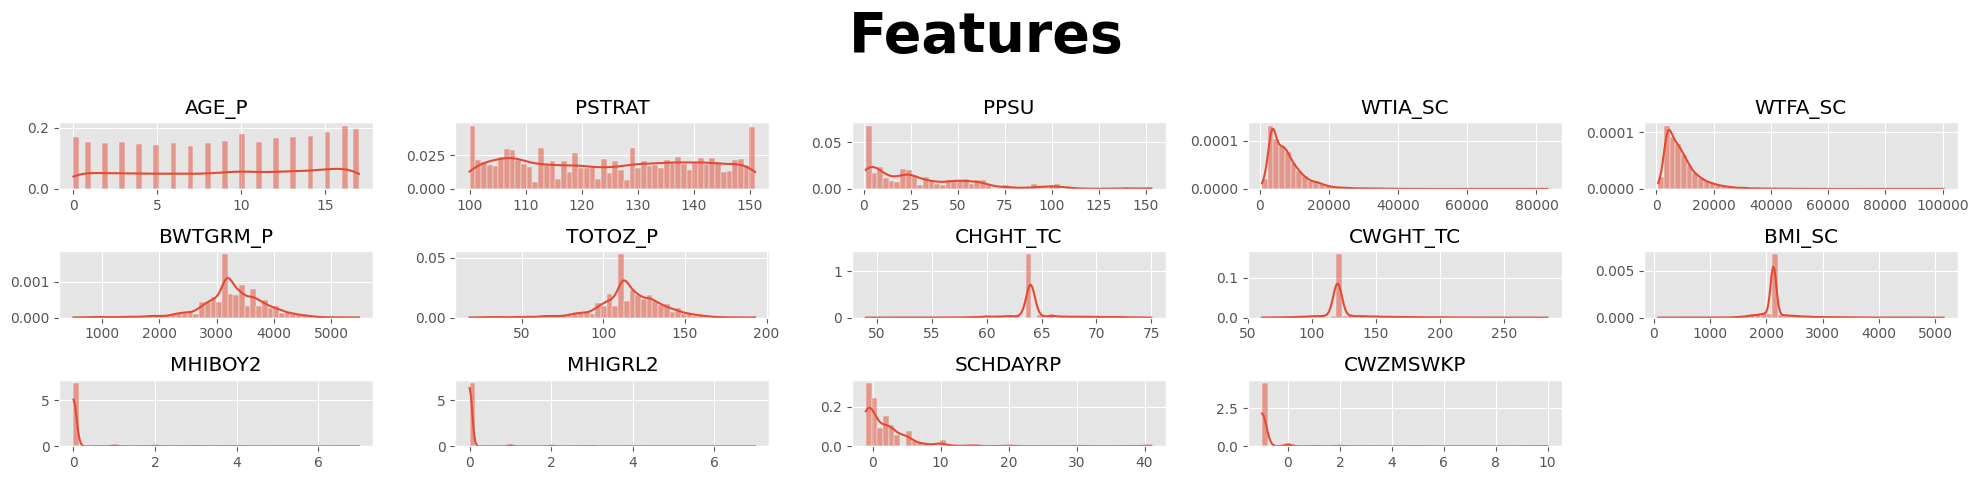

In [15]:
eda.plot_features(data_num, figsize=(20, 5))

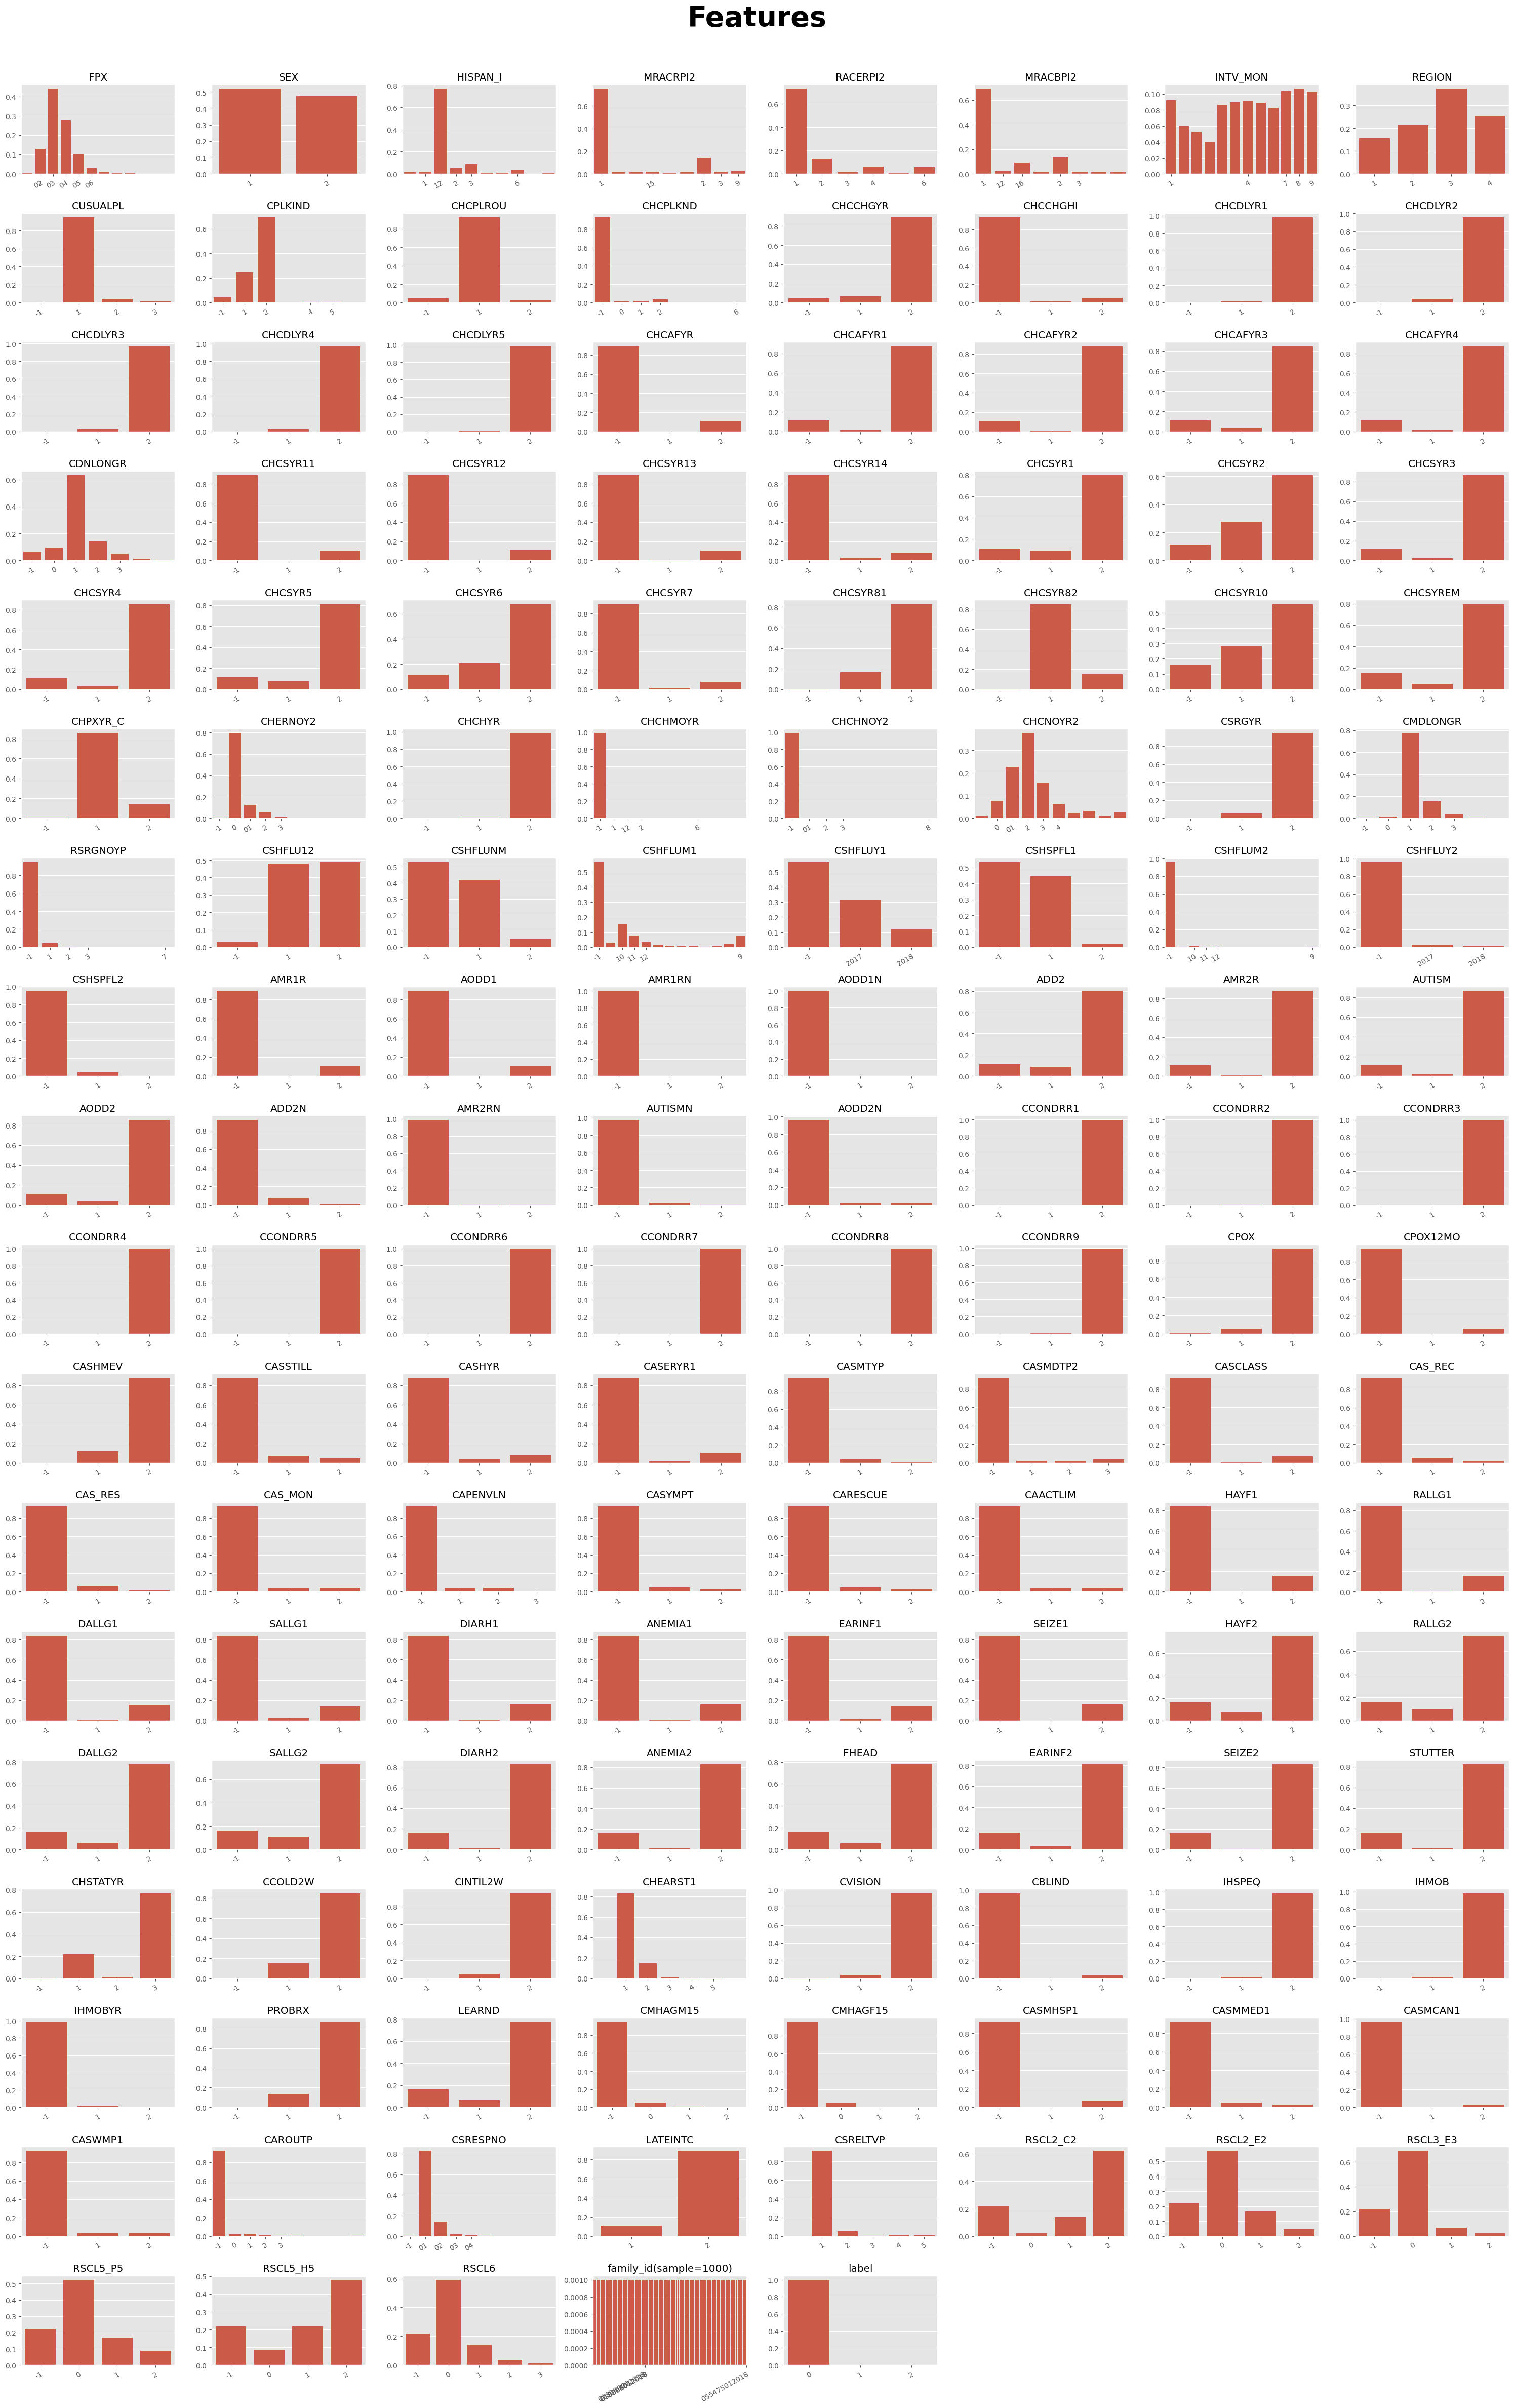

In [18]:
eda.plot_features(data_cat, n_cols=8, figsize=(30, 50))

---

In [ ]:
data['CWZMSWKP'].value_counts()

In [ ]:
data.isna().any()